In [7]:
from diffusers import StableDiffusionXLPipeline, StableDiffusionXLImg2ImgPipeline
import torch

from diffusers import AutoPipelineForImage2Image
from diffusers.utils import load_image

from PIL import Image

In [8]:
base = StableDiffusionXLPipeline.from_single_file(
    "/home/j-j10a704/models/epoch12.safetensors", use_safetensors=True,
    torch_dtype=torch.float16
).to("cuda:8")

# use from_pipe to avoid consuming additional memory when loading a checkpoint
base = AutoPipelineForImage2Image.from_pipe(base).to("cuda")

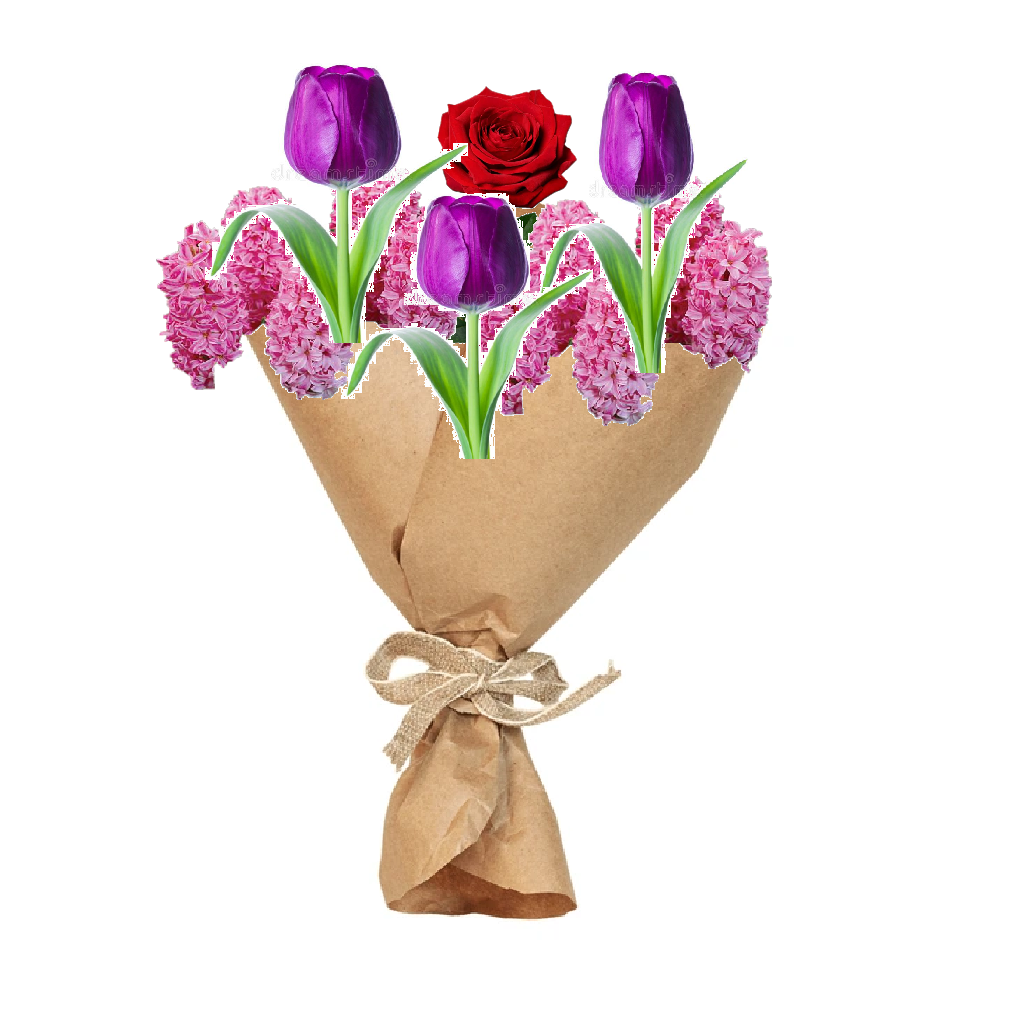

In [9]:
init_image = Image.open("./test.png")
init_image

100%|██████████| 35/35 [00:13<00:00,  2.68it/s]


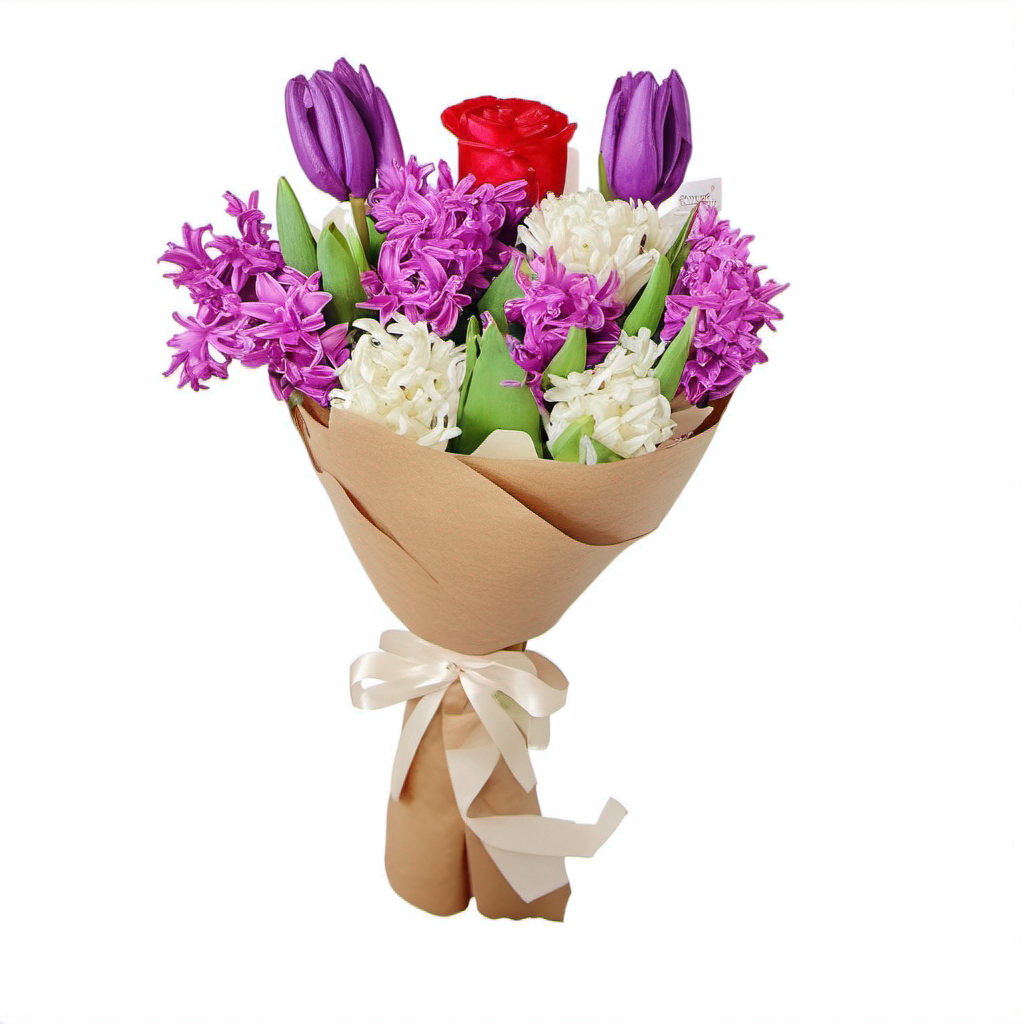

In [11]:
prompt = "hyacinth, red rose, purple_tulip, product image, a bouquet wraped in paper, simple background, white background"
image = base(prompt, image=init_image, strength=0.7, guidance_scale=10.5).images[0]

image

In [12]:
refiner = StableDiffusionXLImg2ImgPipeline.from_single_file(
    "/home/j-j10a704/models/refiner.safetensors",
    text_encoder_2=base.text_encoder_2,
    vae=base.vae,
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant="fp16",
).to("cuda:8")

100%|██████████| 6/6 [00:01<00:00,  3.12it/s]


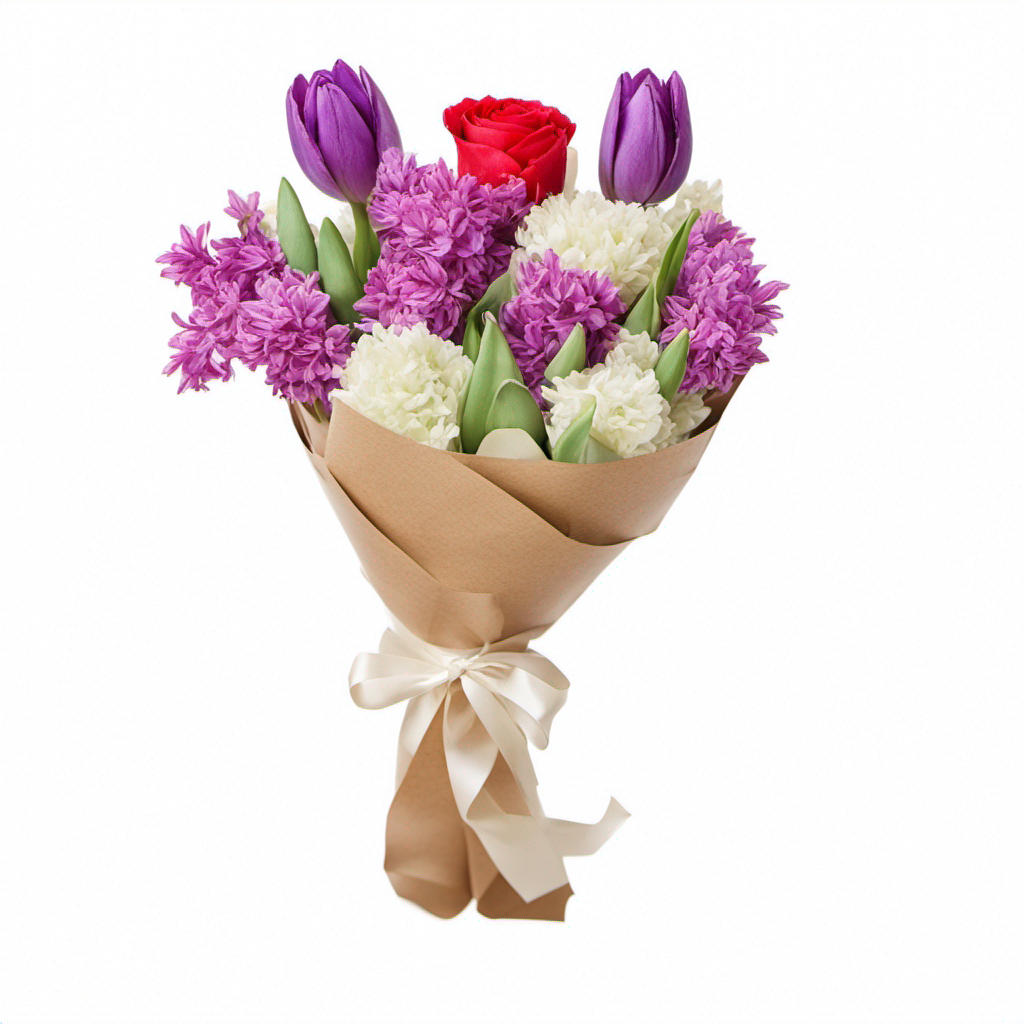

In [13]:
image = refiner(
    prompt=prompt,
    num_inference_steps=20,
    image=image,
).images[0]

image